In [1]:
#데이터 가져오기
import pandas as pd

beauty_data = pd.read_csv('beauty_data_extend.csv')
df1 = beauty_data[['ER','active_rate']]

# print(df1.describe())

In [2]:
# Schaling
# ER과 active_rate값의 차이가 크지 않기 때문에 Schaling이 딱히 필요가 없다.
# from sklearn import preprocessing

# x = df1.values

# min_max_scaler = preprocessing.MinMaxScaler()# (1)minmaxschaler
# standard_scaler = preprocessing.StandardScaler()# (2)standardschaler

# x_scaled1 = min_max_scaler.fit_transform(x)
# x_scaled2 = standard_scaler.fit_transform(x)

# df1 = pd.DataFrame(x_scaled1)
# df2 = pd.DataFrame(x_scaled2)

# df_lst = [df1, df2]

# print(df1.describe())
# print(df2.describe())

# for i in range(2):
#     df_lst[i].columns = ['ER', 'active_rate']

In [7]:
# (2feature)K-means
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

model = KMeans(n_clusters=4,algorithm='auto') # K 설정
model.fit(df1)
predict = pd.DataFrame(model.predict(df1))
predict.columns=['predict']
# 클러스터 라벨링 된 것을 데이터프레임으로 저장
r1 = pd.concat([df1,predict],axis=1)
print(model.inertia_)
print(r1.head())

9.016441992270947
         ER  active_rate  follower  predict
0  0.401763     0.031694  0.752430        2
1  0.292925     0.060556  0.478786        2
2  0.403657     0.022957  0.615203        2
3  0.329045     0.017219  0.512407        2
4  0.180205     0.011998  0.276270        0
<class 'sklearn.cluster.k_means_.KMeans'>


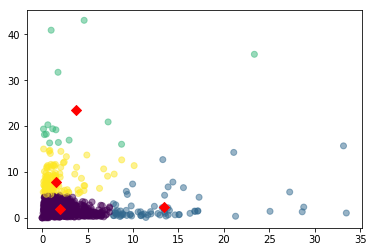

In [4]:
# K-means 분포도 시각화

plt.scatter(r1['ER'],r1['active_rate'],c=r1['predict'],alpha=0.5)

centers = pd.DataFrame(model.cluster_centers_,columns=['ER','active_rate'])
center_x = centers['ER']
center_y = centers['active_rate']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.savefig('savefig_default.png', facecolor='#eeeeee')

0.5862809316505159


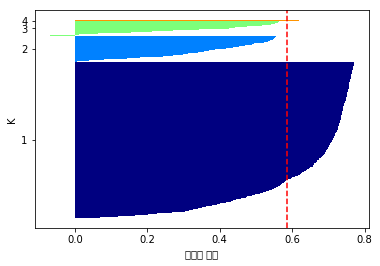

In [5]:
# 실루엣 지수 - cluster 평가 척도
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    print(silhoutte_avg) # 실루엣 평균값 출력
    
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('실루엣 계수')
    plt.show()


y_km = model.fit_predict(df1)
plotSilhouette(df1, y_km)

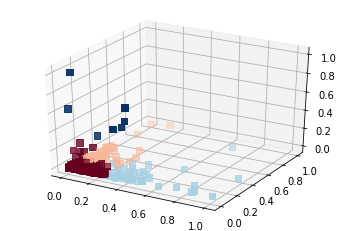

0.6157571965487058


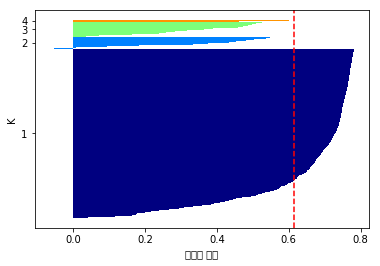

In [6]:
# (3feature)K-means

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn import preprocessing

df1 = beauty_data[['ER', 'active_rate', 'follower']]

x = df1.values
min_max_scaler = preprocessing.MinMaxScaler()# (1)minmaxschaler
x_scaled1 = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled1)
df1.columns = ['ER', 'active_rate', 'follower']


model = KMeans(n_clusters=4,algorithm='auto')
model.fit(df1)
predict = pd.DataFrame(model.predict(df1))
predict.columns=['Cluster']
# 클러스터 라벨링 된 것을 데이터프레임으로 저장
r1 = pd.concat([df1,predict],axis=1)
# print(model.inertia_)
# print(r1.head())


df = pd.DataFrame(r1, columns=['ER', 'active_rate','follower',"Cluster"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['ER'])
y = np.array(df['active_rate'])
z = np.array(df['follower'])

ax.scatter(x,y,z, marker="s", c=df["Cluster"], s=40, cmap="RdBu")

plt.show()

#실루엣 계수
y_km = model.fit_predict(df)
plotSilhouette(df1, y_km)

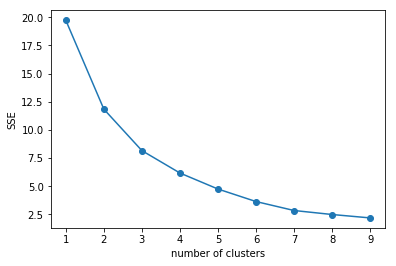

In [6]:
# 최적의 K 찾기 (elbow 그래프)

def elbow(X):
    ks = range(1,10)
    sse = []
    for k in ks:
        model = KMeans(n_clusters=k, algorithm = 'auto')
        model.fit(X)
        sse.append(model.inertia_)
        
    plt.plot(ks, sse, marker = 'o')
    plt.xlabel('number of clusters')
    plt.ylabel('SSE')
    plt.show()

elbow(df1)

In [39]:
# 생성된 cluster 별 데이터프레임 형성
r3 = r1['predict']
beauty_data_cluster = pd.concat([beauty_data, r3], axis=1)
# grouped = beauty_data_cluster.groupby(beauty_data_cluster['predict'])
cs_0 = beauty_data_cluster[beauty_data_cluster['predict'] == 0]
cs_1 = beauty_data_cluster[beauty_data_cluster['predict'] == 1]
cs_2 = beauty_data_cluster[beauty_data_cluster['predict'] == 2]
cs_3 = beauty_data_cluster[beauty_data_cluster['predict'] == 3]

print(cs_0.describe())

       Unnamed: 0          post      follower       follow  open_account  \
count  758.000000    758.000000  7.580000e+02   758.000000         758.0   
mean   465.588391   1799.864116  3.519244e+05  1079.802111           1.0   
std    267.776138   1926.871221  2.110073e+06  1771.340621           0.0   
min      5.000000     30.000000  5.606000e+03     0.000000           1.0   
25%    238.250000    552.750000  4.176525e+04   230.750000           1.0   
50%    460.500000   1199.000000  7.787450e+04   410.500000           1.0   
75%    700.750000   2369.250000  1.435308e+05   812.500000           1.0   
max    939.000000  13048.000000  4.390702e+07  7475.000000           1.0   

       official_account     image_love  image_comment    video_love  \
count        758.000000     758.000000     758.000000  7.580000e+02   
mean           0.135884    6471.215040      55.240106  2.490651e+04   
std            0.342892   31533.944279     218.349308  1.454034e+05   
min            0.000000       0